# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# EDA and Data Preprocessing

## 1. Read the data

In [2]:
car = pd.read_csv("car_train.csv")
car.columns

Index(['rownum', 'price', 'acquisition_date', 'badge', 'body_type', 'category',
       'colour', 'cylinders', 'economy', 'fuel', 'last_updated', 'litres',
       'location', 'make', 'model', 'odometer', 'transmission', 'year'],
      dtype='object')

In [3]:
car

,rownum,price,acquisition_date,badge,body_type,category,colour,cylinders,economy,fuel,last_updated,litres,location,make,model,odometer,transmission,year
0,0,8560.0,2017-06-22,RS,Hatch,Used,Silver,4.0,8.9,Unleaded,2017-06-22,2.0,2,Subaru,Impreza,134944.0,Manual,2009
1,3,17074.0,2017-06-22,2.0i,Hatch,Used,Silver,4.0,6.8,Unleaded,2017-06-22,2.0,3,Subaru,Impreza,33304.0,Automatic,2014
2,4,8526.0,2017-06-22,R,Hatch,Used,Blue,4.0,8.9,Unleaded,2017-06-22,2.0,6,Subaru,Impreza,81668.0,Manual,2007
3,5,10952.0,2017-06-22,R,Hatch,Used,Black,4.0,8.8,Unleaded,2017-06-22,2.0,8,Subaru,Impreza,48051.0,Automatic,2009
4,6,33964.0,2017-06-22,WRX STI,Sedan,Used,Grey,4.0,10.5,Unleaded,2017-06-22,2.5,3,Subaru,Impreza,51516.0,Manual,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38501,53452,38036.0,2017-06-21,2.5i-S CVT AWD,Suv,NaN,Silver,NaN,NaN,Unleaded,2017-06-21,NaN,1,Subaru,Forester,29128.0,Automatic,2016
38502,53453,39913.0,2017-06-21,2.5i-S CVT AWD,Suv,NaN,White,NaN,NaN,Unleaded,2017-06-21,NaN,1,Subaru,Forester,8334.0,Automatic,2015
38503,53455,6061.0,2017-06-22,NaN,Hatch,NaN,Silver,NaN,NaN,NaN,2017-06-27,NaN,1,Subaru,Impreza,108.0,Manual,2006
38504,53456,13980.0,2017-06-22,RS (AWD) LTD ED,Hatch,NaN,Blue,NaN,NaN,Unleaded,2017-06-27,NaN,1,Subaru,Impreza,98799.0,Manual,2010


In [4]:
# from the dataset, we know the column 'rownum' and 'location' represents no meaning, therefore, we dropped them
car = car.drop(['rownum', 'location'], axis=1)
car

,price,acquisition_date,badge,body_type,category,colour,cylinders,economy,fuel,last_updated,litres,make,model,odometer,transmission,year
0,8560.0,2017-06-22,RS,Hatch,Used,Silver,4.0,8.9,Unleaded,2017-06-22,2.0,Subaru,Impreza,134944.0,Manual,2009
1,17074.0,2017-06-22,2.0i,Hatch,Used,Silver,4.0,6.8,Unleaded,2017-06-22,2.0,Subaru,Impreza,33304.0,Automatic,2014
2,8526.0,2017-06-22,R,Hatch,Used,Blue,4.0,8.9,Unleaded,2017-06-22,2.0,Subaru,Impreza,81668.0,Manual,2007
3,10952.0,2017-06-22,R,Hatch,Used,Black,4.0,8.8,Unleaded,2017-06-22,2.0,Subaru,Impreza,48051.0,Automatic,2009
4,33964.0,2017-06-22,WRX STI,Sedan,Used,Grey,4.0,10.5,Unleaded,2017-06-22,2.5,Subaru,Impreza,51516.0,Manual,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38501,38036.0,2017-06-21,2.5i-S CVT AWD,Suv,NaN,Silver,NaN,NaN,Unleaded,2017-06-21,NaN,Subaru,Forester,29128.0,Automatic,2016
38502,39913.0,2017-06-21,2.5i-S CVT AWD,Suv,NaN,White,NaN,NaN,Unleaded,2017-06-21,NaN,Subaru,Forester,8334.0,Automatic,2015
38503,6061.0,2017-06-22,NaN,Hatch,NaN,Silver,NaN,NaN,NaN,2017-06-27,NaN,Subaru,Impreza,108.0,Manual,2006
38504,13980.0,2017-06-22,RS (AWD) LTD ED,Hatch,NaN,Blue,NaN,NaN,Unleaded,2017-06-27,NaN,Subaru,Impreza,98799.0,Manual,2010


In [5]:
# Check the N/A value and delete them 
car.isnull().sum()[car.isnull().sum() > 0]

price              3
badge           1573
body_type          2
category        2488
colour          1961
cylinders       2488
economy         3920
fuel              28
litres          2488
odometer        1550
transmission       7
dtype: int64

In [6]:
car.dropna(axis=0, how='any', inplace=True)
car

,price,acquisition_date,badge,body_type,category,colour,cylinders,economy,fuel,last_updated,litres,make,model,odometer,transmission,year
0,8560.0,2017-06-22,RS,Hatch,Used,Silver,4.0,8.9,Unleaded,2017-06-22,2.0,Subaru,Impreza,134944.0,Manual,2009
1,17074.0,2017-06-22,2.0i,Hatch,Used,Silver,4.0,6.8,Unleaded,2017-06-22,2.0,Subaru,Impreza,33304.0,Automatic,2014
2,8526.0,2017-06-22,R,Hatch,Used,Blue,4.0,8.9,Unleaded,2017-06-22,2.0,Subaru,Impreza,81668.0,Manual,2007
3,10952.0,2017-06-22,R,Hatch,Used,Black,4.0,8.8,Unleaded,2017-06-22,2.0,Subaru,Impreza,48051.0,Automatic,2009
4,33964.0,2017-06-22,WRX STI,Sedan,Used,Grey,4.0,10.5,Unleaded,2017-06-22,2.5,Subaru,Impreza,51516.0,Manual,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38445,9842.0,2018-03-09,R,Sedan,Private,White,4.0,8.8,Unleaded,2018-03-09,2.0,Subaru,Impreza,117131.0,Automatic,2010
38446,5096.0,2018-03-09,X,SUV,Private,White,4.0,8.7,Unleaded,2018-03-09,2.5,Subaru,Forester,224462.0,Manual,2005
38447,5021.0,2018-03-09,XS,SUV,Private,Silver,4.0,9.5,Unleaded,2018-03-09,2.5,Subaru,Forester,200356.0,Manual,2002
38481,37806.0,2017-06-21,2.0D-L,SUV,Demo,Green,4.0,6.3,Diesel,2017-06-23,2.0,Subaru,Forester,479.0,Automatic,2016


## 2. Data Anaysis

In [7]:
#Check data types and use visulization to observe data
car.dtypes

price               float64
acquisition_date     object
badge                object
body_type            object
category             object
colour               object
cylinders           float64
economy             float64
fuel                 object
last_updated         object
litres              float64
make                 object
model                object
odometer            float64
transmission         object
year                  int64
dtype: object

In [8]:
car_numeric_features = ['price', 'cylinders', 'economy', 'litres', 'odometer', 'year']

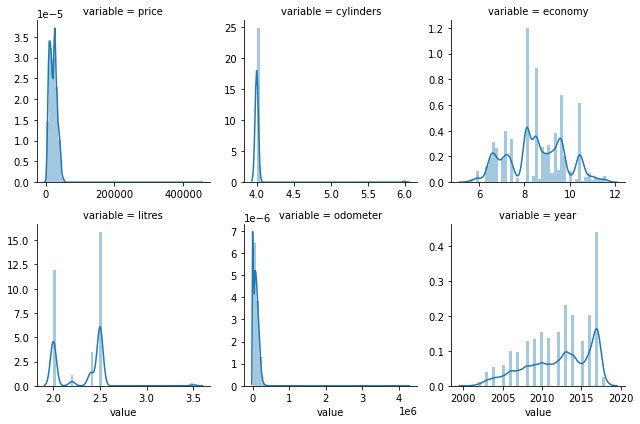

In [9]:
import seaborn as sns
f_car = pd.melt(car, value_vars=car_numeric_features)
g_car = sns.FacetGrid(f_car, col="variable",  col_wrap=3, sharex=False, sharey=False)
g_car = g_car.map(sns.distplot, "value")
plt.show()

In [10]:
category_features = ['badge', 'body_type', 'category', 'colour', 'fuel',
    'make', 'model', 'transmission']

# understand the distribution of different features
for feature in category_features:
    print("Distribution:" + feature)
    print("{} has {} values".format(feature, car[feature].nunique()))
    print(car[feature].value_counts())
    print(72 * '-')

Distribution:badge
badge has 72 values
GX                                    4418
2.5i-L                                2296
WRX                                   2144
CV                                    2023
X                                     1924
                                      ... 
WRX Club Spec Evo 6                      8
X Sports                                 4
X Special Edition                        2
WRX Petter Solberg Limited Edition       1
2.5i-L Fleet Edition                     1
Name: badge, Length: 72, dtype: int64
------------------------------------------------------------------------
Distribution:body_type
body_type has 3 values
SUV      22566
Hatch     5856
Sedan     4385
Name: body_type, dtype: int64
------------------------------------------------------------------------
Distribution:category
category has 4 values
Used       16711
Private    10388
Other       4030
Demo        1678
Name: category, dtype: int64
------------------------------------------

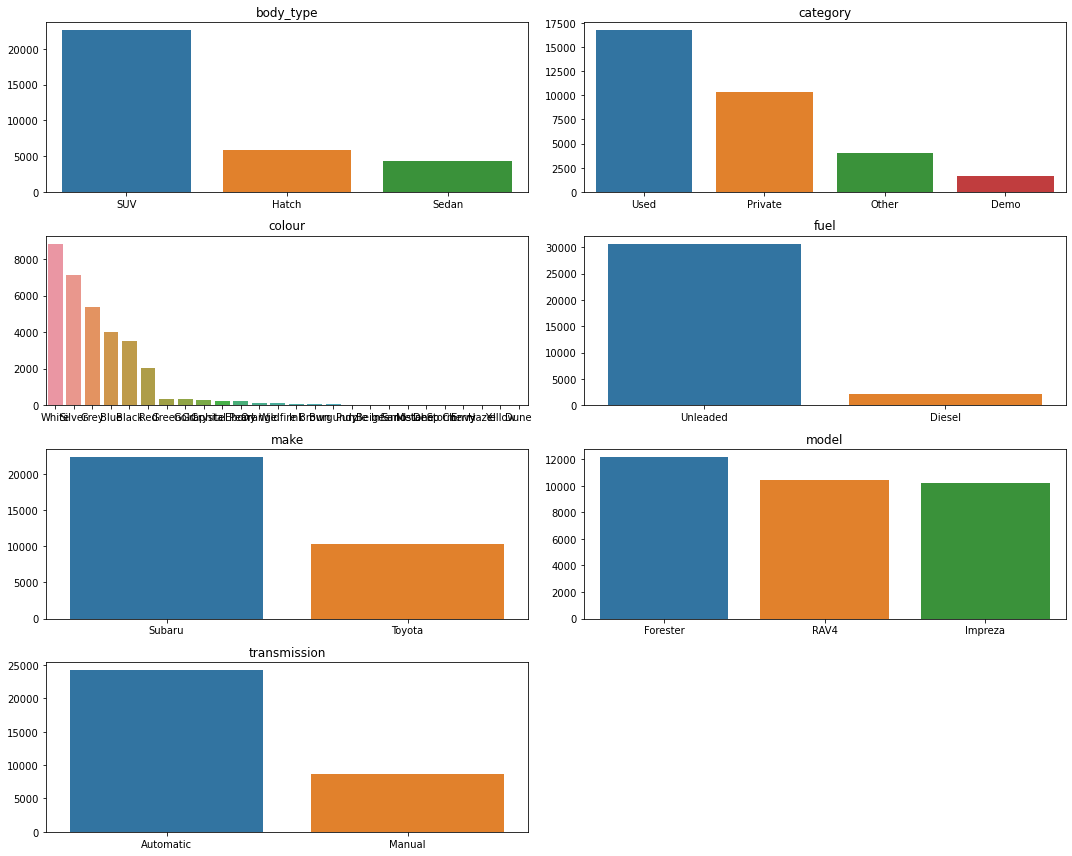

In [11]:
#visuliz the feature wihch has lower than 30 value
plt.figure(figsize=(15, 12))
i = 1
for feature in category_features:
    if car[feature].nunique() <= 30:
        plt.subplot(4, 2, i)
        i += 1
        v = car[feature].value_counts()
        fig = sns.barplot(x=v.index, y=v.values)
        plt.title(feature)
plt.tight_layout()
plt.show()

In [12]:
# consider feature"badge" has too much categorical values which would be usseless to 'price', so we will drop this column
car.drop("badge",axis=1,inplace=True)
car

,price,acquisition_date,body_type,category,colour,cylinders,economy,fuel,last_updated,litres,make,model,odometer,transmission,year
0,8560.0,2017-06-22,Hatch,Used,Silver,4.0,8.9,Unleaded,2017-06-22,2.0,Subaru,Impreza,134944.0,Manual,2009
1,17074.0,2017-06-22,Hatch,Used,Silver,4.0,6.8,Unleaded,2017-06-22,2.0,Subaru,Impreza,33304.0,Automatic,2014
2,8526.0,2017-06-22,Hatch,Used,Blue,4.0,8.9,Unleaded,2017-06-22,2.0,Subaru,Impreza,81668.0,Manual,2007
3,10952.0,2017-06-22,Hatch,Used,Black,4.0,8.8,Unleaded,2017-06-22,2.0,Subaru,Impreza,48051.0,Automatic,2009
4,33964.0,2017-06-22,Sedan,Used,Grey,4.0,10.5,Unleaded,2017-06-22,2.5,Subaru,Impreza,51516.0,Manual,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38445,9842.0,2018-03-09,Sedan,Private,White,4.0,8.8,Unleaded,2018-03-09,2.0,Subaru,Impreza,117131.0,Automatic,2010
38446,5096.0,2018-03-09,SUV,Private,White,4.0,8.7,Unleaded,2018-03-09,2.5,Subaru,Forester,224462.0,Manual,2005
38447,5021.0,2018-03-09,SUV,Private,Silver,4.0,9.5,Unleaded,2018-03-09,2.5,Subaru,Forester,200356.0,Manual,2002
38481,37806.0,2017-06-21,SUV,Demo,Green,4.0,6.3,Diesel,2017-06-23,2.0,Subaru,Forester,479.0,Automatic,2016


In [13]:
# based on existed date data to calculate the used time of each car
import datetime
car['last_updated']= pd.to_datetime(car['last_updated']) 
car['last_update_year'] = car['last_updated'].dt.year
car['used_time'] = car['last_update_year'] - car['year'] 
car['used_time'].head

<bound method NDFrame.head of 0         8
1         3
2        10
3         8
4         6
         ..
38445     8
38446    13
38447    16
38481     1
38489     0
Name: used_time, Length: 32807, dtype: int64>

In [14]:
# use 'used_time' to replace other date data
car = car.drop(['acquisition_date', 'last_updated', 'year','last_update_year'], axis=1)
car

,price,body_type,category,colour,cylinders,economy,fuel,litres,make,model,odometer,transmission,used_time
0,8560.0,Hatch,Used,Silver,4.0,8.9,Unleaded,2.0,Subaru,Impreza,134944.0,Manual,8
1,17074.0,Hatch,Used,Silver,4.0,6.8,Unleaded,2.0,Subaru,Impreza,33304.0,Automatic,3
2,8526.0,Hatch,Used,Blue,4.0,8.9,Unleaded,2.0,Subaru,Impreza,81668.0,Manual,10
3,10952.0,Hatch,Used,Black,4.0,8.8,Unleaded,2.0,Subaru,Impreza,48051.0,Automatic,8
4,33964.0,Sedan,Used,Grey,4.0,10.5,Unleaded,2.5,Subaru,Impreza,51516.0,Manual,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38445,9842.0,Sedan,Private,White,4.0,8.8,Unleaded,2.0,Subaru,Impreza,117131.0,Automatic,8
38446,5096.0,SUV,Private,White,4.0,8.7,Unleaded,2.5,Subaru,Forester,224462.0,Manual,13
38447,5021.0,SUV,Private,Silver,4.0,9.5,Unleaded,2.5,Subaru,Forester,200356.0,Manual,16
38481,37806.0,SUV,Demo,Green,4.0,6.3,Diesel,2.0,Subaru,Forester,479.0,Automatic,1


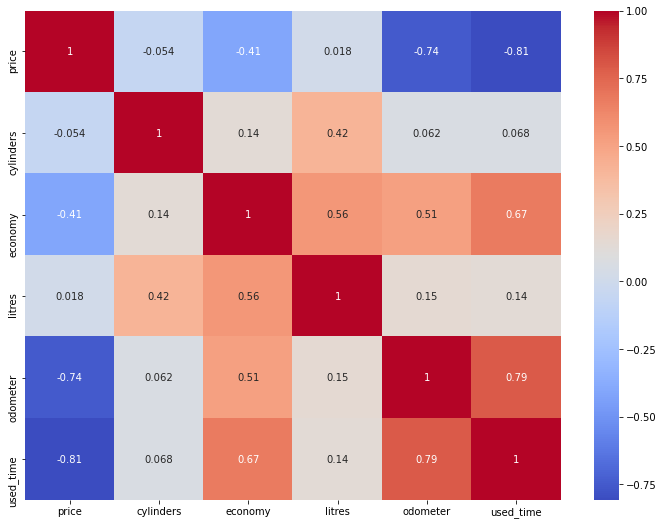

In [15]:
# correlation analysis
plt.figure(figsize=(12, 9))
sns.heatmap(car.corr(), annot=True, cmap='coolwarm') 
plt.show() 

In [16]:
print(car['cylinders'].corr(car['price'], method='spearman'))
print(car['economy'].corr(car['price'], method='spearman'))
print(car['litres'].corr(car['price'], method='spearman'))
print(car['odometer'].corr(car['price'], method='spearman'))
print(car['used_time'].corr(car['price'], method='spearman'))

-0.05574119697034609
-0.5104008669501706
0.10093507483926976
-0.8587431058694049
-0.8742449247371866


## 3. Data Preprcessing

<AxesSubplot:ylabel='Frequency'>

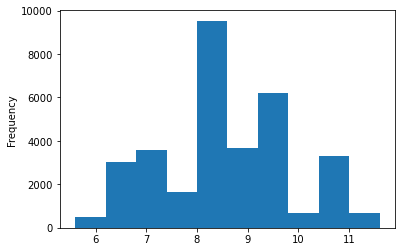

In [17]:
# Scaling, take economy as an example
car['economy'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

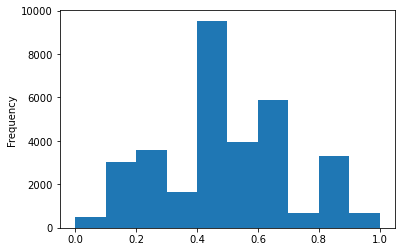

In [18]:
car['economy'] = ((car['economy'] - np.min(car['economy'])) / (np.max(car['economy']) - np.min(car['economy'])))
car['economy'].plot.hist()

In [19]:
car['price'] = ((car['price'] - np.min(car['price'])) / (np.max(car['price']) - np.min(car['price'])))
car['cylinders'] = ((car['cylinders'] - np.min(car['cylinders'])) / (np.max(car['cylinders']) - np.min(car['cylinders'])))
car['litres'] = ((car['litres'] - np.min(car['litres'])) / (np.max(car['litres']) - np.min(car['litres'])))
car['odometer'] = ((car['odometer'] - np.min(car['odometer'])) / (np.max(car['odometer']) - np.min(car['odometer'])))
car['used_time'] = ((car['used_time'] - np.min(car['used_time'])) / (np.max(car['used_time']) - np.min(car['used_time'])))

In [20]:
# change categorical data to numeric data
car = pd.get_dummies(car, columns=['body_type', 'category', 'colour', 'fuel',
    'make', 'model', 'transmission'])

In [21]:
print(car.shape)
car.columns

(32807, 48)


Index(['price', 'cylinders', 'economy', 'litres', 'odometer', 'used_time',
       'body_type_Hatch', 'body_type_SUV', 'body_type_Sedan', 'category_Demo',
       'category_Other', 'category_Private', 'category_Used', 'colour_Beige',
       'colour_Black', 'colour_Blue', 'colour_Brown', 'colour_Burgundy',
       'colour_Crystal Pearl', 'colour_Deep Cherry', 'colour_Dune',
       'colour_Ebony', 'colour_Envy', 'colour_Gold', 'colour_Graphite',
       'colour_Green', 'colour_Grey', 'colour_Hazel', 'colour_Inferno',
       'colour_Ink', 'colour_Metal Storm', 'colour_Orange', 'colour_Purple',
       'colour_Red', 'colour_Sandstone', 'colour_Silver', 'colour_White',
       'colour_Wildfire', 'colour_Yellow', 'fuel_Diesel', 'fuel_Unleaded',
       'make_Subaru', 'make_Toyota', 'model_Forester', 'model_Impreza',
       'model_RAV4', 'transmission_Automatic', 'transmission_Manual'],
      dtype='object')

### Split the data set to train data and test data

In [22]:
#all the feartures are used and test size = 0.2
from sklearn.model_selection import train_test_split
car_train, car_test = train_test_split(car, test_size=0.2, random_state=42)

### Build the evaluation model

In [23]:
#function for evaluation of model

def result(test_y, pred_y):
    r=[]
    r.append(metrics.mean_absolute_error(test_y, pred_y))
    r.append(metrics.mean_squared_error(test_y, pred_y))
    r.append(np.sqrt(metrics.mean_squared_error(test_y, pred_y)))
    r.append(round(r2_score(test_y, pred_y)*100,4))
    return (r)

compare=pd.DataFrame(index=['MAE', 'MSE', 'RMSE', 'R2 Score'])    

In [24]:
X = car.drop(['price'],axis='columns')
y = car[['price']]
print(X.shape)
print(y.shape)

(32807, 47)
(32807, 1)


# Model Application - Liner Regression

In [25]:
#use all the features in the dataset

In [26]:
train_X = car_train.drop(columns=['price'])
train_y = car_train[['price']]

In [27]:
test_X = car_test.drop(columns=['price'])
test_y = car_test[['price']]

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_X, train_y)
pred_y = lr.predict(test_X)
r2_score(test_y, pred_y)

0.8431018733839559

### Use different features to improve the accuracy

In [29]:
#delete numeric features with lower correlation

In [30]:
train_X_1 = car_train.drop(columns=['price','economy', 'cylinders','litres'])
test_X_1 = car_test.drop(columns=['price','economy', 'cylinders','litres'])

In [31]:
lr1 = LinearRegression()
lr1.fit(train_X_1, train_y)
pred_y_1 = lr1.predict(test_X_1)
r2_score(test_y, pred_y_1)

0.8006462079134774

In [32]:
#delete colour features with lower distribution

In [33]:
train_X_2 = car_train.drop(columns=['price','colour_Beige',
       'colour_Brown', 'colour_Burgundy',  'colour_Dune',
        'colour_Envy', 'colour_Hazel', 'colour_Inferno',
       'colour_Ink', 'colour_Metal Storm', 'colour_Purple',
        'colour_Sandstone', 'colour_Yellow', 'colour_Deep Cherry'])
test_X_2 = car_test.drop(columns=['price','colour_Beige',
       'colour_Brown', 'colour_Burgundy',  'colour_Dune',
        'colour_Envy', 'colour_Hazel', 'colour_Inferno',
       'colour_Ink', 'colour_Metal Storm', 'colour_Purple',
        'colour_Sandstone', 'colour_Yellow', 'colour_Deep Cherry'])

In [34]:
lr2 = LinearRegression()
lr2.fit(train_X_2, train_y)
pred_y_2 = lr2.predict(test_X_2)
r2_score(test_y, pred_y_2)

0.8438737890550276

### Conclusion: use all features can get the best Linear Regression model

In [35]:
from sklearn.model_selection import cross_val_score

cross_val_score(lr, X , y, cv=5, scoring='r2')

array([ 8.40422791e-01, -1.40557743e+16, -1.47679186e+12,  5.89564254e-01,
        8.38966671e-01])

In [36]:
print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(test_y, pred_y))
print('Mean Squared  Error      : ', metrics.mean_squared_error(test_y, pred_y))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(test_y, pred_y)))
print('R Squared Error          : ', metrics.r2_score(test_y, pred_y))
r1_lr=result(test_y, pred_y)
compare['Linear Regression']=r1_lr
compare.to_csv('errors.csv')

		Error Table
Mean Absolute Error      :  0.007219589674370049
Mean Squared  Error      :  8.627776557246645e-05
Root Mean Squared  Error :  0.009288582538389076
R Squared Error          :  0.8431018733839559


In [37]:
print(lr.intercept_)
print(lr.coef_)

[1.54355483e+10]
[[-2.43080332e-03  4.54140054e-02 -9.83718963e-03 -3.66542720e-01
  -7.36292312e-02 -6.50959920e+10 -2.79233414e+09 -6.50959920e+10
   7.62961899e+09  7.62961899e+09  7.62961899e+09  7.62961899e+09
   3.72218299e+08  3.72218299e+08  3.72218299e+08  3.72218299e+08
   3.72218299e+08  3.72218299e+08  3.72218299e+08  3.72218299e+08
   3.72218299e+08  3.72218299e+08  3.72218299e+08  3.72218299e+08
   3.72218299e+08  3.72218299e+08  3.72218299e+08  3.72218299e+08
   3.72218299e+08  3.72218299e+08  3.72218299e+08  3.72218299e+08
   3.72218299e+08  3.72218299e+08  3.72218299e+08  3.72218299e+08
   3.72218299e+08  3.72218299e+08 -2.38335152e+09 -2.38335152e+09
  -3.06140162e+09 -6.93435057e+09 -1.38380270e+10  4.84656308e+10
  -9.96507809e+09 -1.36227127e+09 -1.36227127e+09]]


sort of linear regression coefficient: 'body_type_SUV', 'model_RAV4'

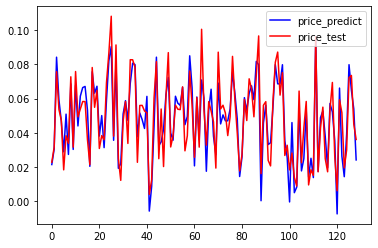

In [38]:
plt.figure()
plt.plot(range(len(pred_y[1:130])),pred_y[1:130],'b',label="price_predict")
plt.plot(range(len(pred_y[1:130])),test_y[1:130],'r',label="price_test")
plt.legend(loc="upper right")
plt.show()

# Model Application - Decision Tree

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3760  100  3760    0     0   7520      0 --:--:-- --:--:-- --:--:--  7520


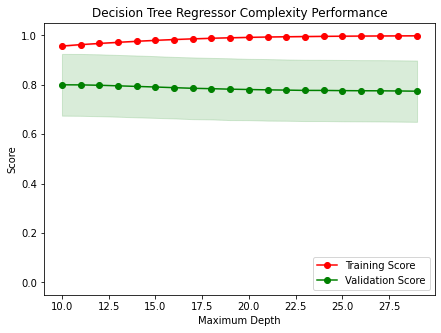

In [39]:
!curl https://raw.githubusercontent.com/francescopisu/Used-car-price-prediction/master/curves.py --output curves.py
import curves
curves.ModelComplexity_DT(train_X, train_y)

In [40]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(train_X, train_y)
pred_y=dt.predict(test_X)

In [41]:
print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(test_y, pred_y))
print('Mean Squared  Error      : ', metrics.mean_squared_error(test_y, pred_y))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(test_y, pred_y)))
print('R Squared Error          : ', metrics.r2_score(test_y, pred_y))
r2_dt=result(test_y, pred_y)
compare['Decision Tree Regression']=r2_dt
compare.to_csv('errors.csv')

		Error Table
Mean Absolute Error      :  0.005084638487603395
Mean Squared  Error      :  0.00018049586400504592
Root Mean Squared  Error :  0.013434874915868995
R Squared Error          :  0.6717640664841988


In [42]:
cross_val_score(dt, X , y, cv=5, scoring='r2')

array([0.85429733, 0.59837906, 0.64680928, 0.63753454, 0.5910835 ])

Feature: 0, Score: 0.00001
Feature: 1, Score: 0.07106
Feature: 2, Score: 0.00228
Feature: 3, Score: 0.25487
Feature: 4, Score: 0.57964
Feature: 5, Score: 0.00052
Feature: 6, Score: 0.04840
Feature: 7, Score: 0.00043
Feature: 8, Score: 0.00024
Feature: 9, Score: 0.00261
Feature: 10, Score: 0.01235
Feature: 11, Score: 0.00109
Feature: 12, Score: 0.00001
Feature: 13, Score: 0.00263
Feature: 14, Score: 0.00154
Feature: 15, Score: 0.00005
Feature: 16, Score: 0.00002
Feature: 17, Score: 0.00018
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00008
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00011
Feature: 23, Score: 0.00025
Feature: 24, Score: 0.00022
Feature: 25, Score: 0.00166
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00001
Feature: 28, Score: 0.00005
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00032
Feature: 31, Score: 0.00006
Feature: 32, Score: 0.00090
Feature: 33, Score: 0.00001
Feature: 34, Score: 0.00141
Feature: 35, Score: 0.00203
Fe

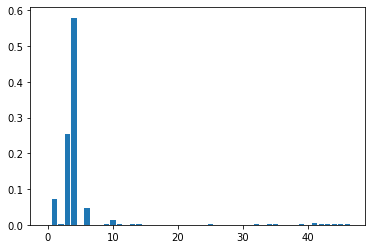

In [43]:
dt_importance = dt.feature_importances_
# summarize feature importance
for i,v in enumerate(dt_importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(dt_importance))], dt_importance)
plt.show()

# Model Application - Random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor

train_X = car_train.drop(columns=['price'])
train_y = car_train[['price']]
train_y = train_y.values.ravel()
test_X = car_test.drop(columns=['price'])
test_y = car_test[['price']]
test_y = test_y.values.ravel()

rf = RandomForestRegressor(n_jobs=-1,random_state=90)
rf.fit(train_X, train_y)
pred_y = rf.predict(test_X)
r2_score(test_y, pred_y)

0.8330930431019241

## Use different parameters to improve the accuracy

### 1. Change n_estimators

0.9072905502831288 1
Running time: 109.101069688797 Seconds


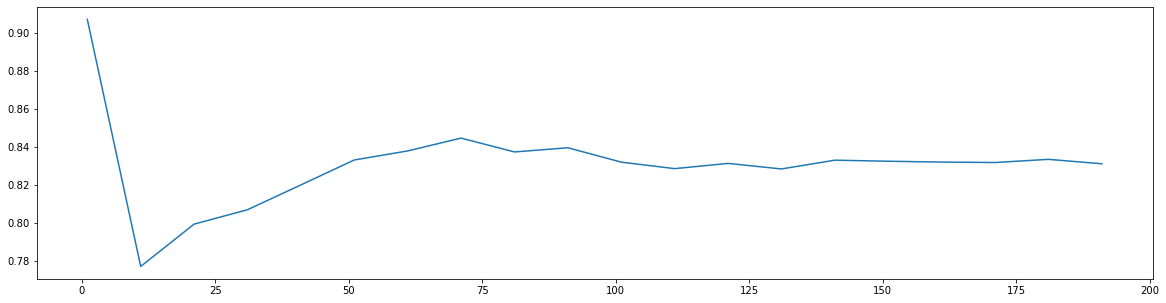

In [45]:
import time
start=time.time()
scorel = []
for i in range(0,200,10): # compare the rf model include 1-200 decision trees
  rf = RandomForestRegressor(n_estimators=i+1,n_jobs=-1,random_state=90)
  rf.fit(train_X, train_y)
  pred_y = rf.predict(test_X)
  score = r2_score(test_y, pred_y).mean()
  scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1)
end=time.time()
print('Running time: %s Seconds'%(end-start))
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()

0.9072905502831288 1
Running time: 3.3308701515197754 Seconds


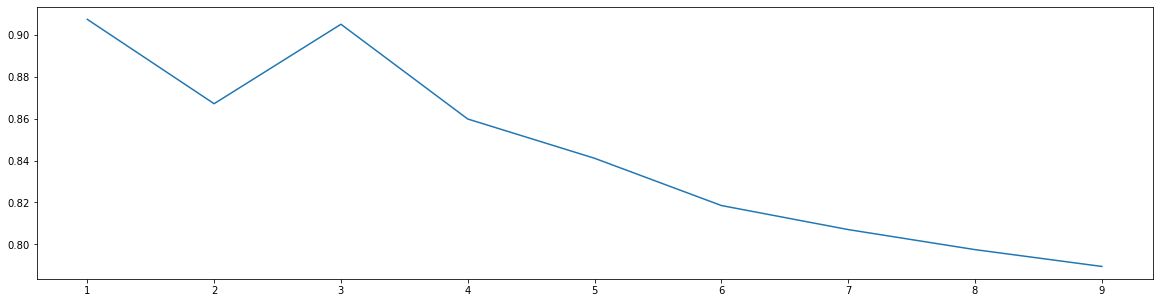

In [46]:
#decrease n_estimators to the range of 1-10
start=time.time()
scorel= []
for i in range(1,10): # compare the rf model include 1-10 decision trees
  rf = RandomForestRegressor(n_estimators=i,n_jobs=-1,random_state=90)
  rf.fit(train_X, train_y)
  pred_y = rf.predict(test_X)
  score = r2_score(test_y, pred_y).mean()
  scorel.append(score)
print(max(scorel),(scorel.index(max(scorel)))+1)
end=time.time()
print('Running time: %s Seconds'%(end-start))
plt.figure(figsize=[20,5])
plt.plot(range(1,10),scorel)
plt.show()

0.8401981692696799 151
Running time: 563.4244868755341 Seconds


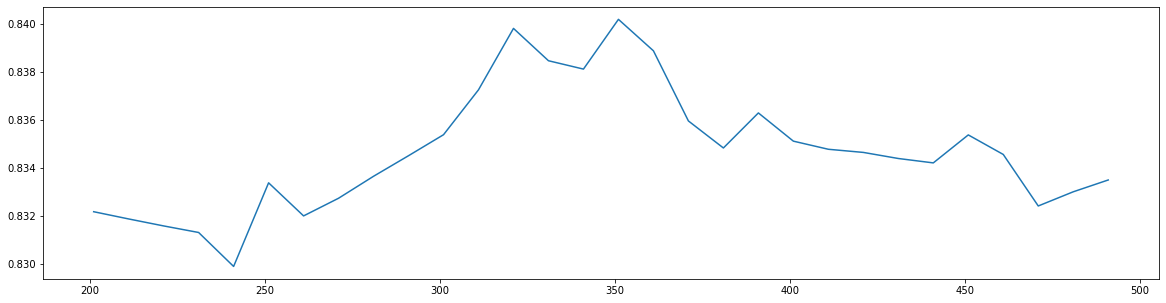

In [47]:
#increase the range to verify
start=time.time()
scorel = []
for i in range(200,500,10): # compare the rf model include 200-500 decision trees
  rf = RandomForestRegressor(n_estimators=i+1,n_jobs=-1,random_state=90)
  rf.fit(train_X, train_y)
  pred_y = rf.predict(test_X)
  score = r2_score(test_y, pred_y).mean()
  scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1)
end=time.time()
print('Running time: %s Seconds'%(end-start))
plt.figure(figsize=[20,5])
plt.plot(range(201,501,10),scorel)
plt.show()

when n_estimators=1，we got the highest r2 score of 0.9072905502831288

### 2. Change max_depth

0.9324849746516445 11
Running time: 27.055145978927612 Seconds


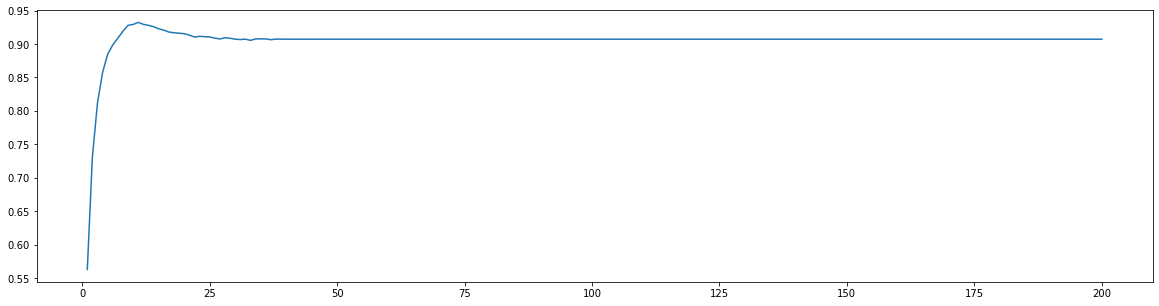

In [48]:
start=time.time()
scorel = []
for i in range(1,201): # compare the rf model include 1-200 depth
  rf = RandomForestRegressor(n_estimators=1,n_jobs=-1,random_state=90,max_depth=i)
  rf.fit(train_X, train_y)
  pred_y = rf.predict(test_X)
  score = r2_score(test_y, pred_y)
  scorel.append(score)
print(max(scorel),(scorel.index(max(scorel)))+1)
end=time.time()
print('Running time: %s Seconds'%(end-start))
plt.figure(figsize=[20,5])
plt.plot(range(1,201),scorel)
plt.show()

When max_depth=11，we got the highest r2 score of 0.9324849746516445

### 3. Change max_features

0.9331489910570554 41
Running time: 2.6458330154418945 Seconds


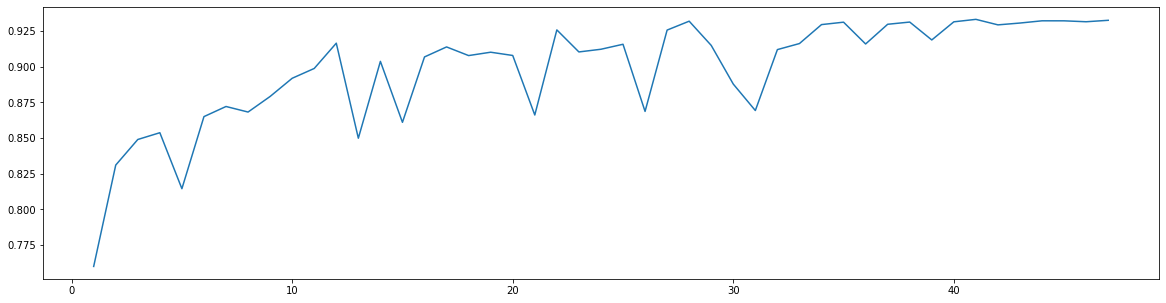

In [49]:
start=time.time()
scorel = []
for i in range(1,48): # compare the rf model include 1-47 features
  rf = RandomForestRegressor(n_estimators=1,n_jobs=-1,random_state=90,max_depth=11,max_features=i)
  rf.fit(train_X, train_y)
  pred_y = rf.predict(test_X)
  score = r2_score(test_y, pred_y)
  scorel.append(score)
print(max(scorel),(scorel.index(max(scorel)))+1)
end=time.time()
print('Running time: %s Seconds'%(end-start))
plt.figure(figsize=[20,5])
plt.plot(range(1,48),scorel)
plt.show()

When max_features=41，we got the highest r2 score of 0.9331489910570554

#### 4. Change min_samples_leaf

0.9331489910570554 1
Running time: 6.942095994949341 Seconds


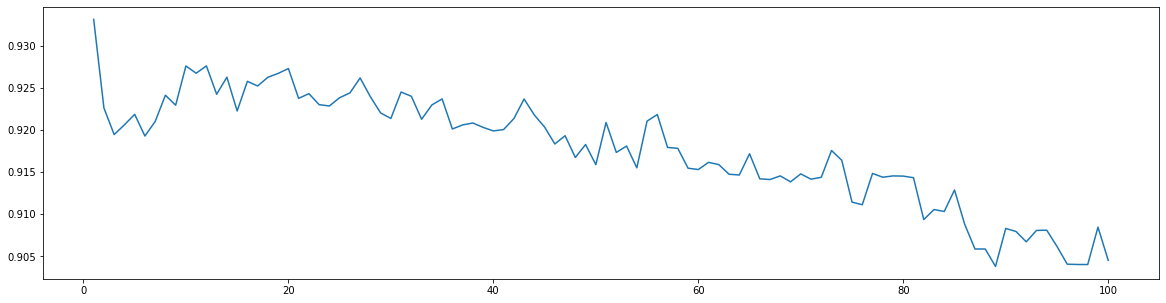

In [50]:
start=time.time()
scorel = []
for i in range(1,101): # compare the rf model include 1-100 samples
  rf = RandomForestRegressor(n_estimators=1,n_jobs=-1,random_state=90,max_depth=11,max_features=41,min_samples_leaf=i)
  rf.fit(train_X, train_y)
  pred_y = rf.predict(test_X)
  score = r2_score(test_y, pred_y)
  scorel.append(score)
print(max(scorel),(scorel.index(max(scorel)))+1)
end=time.time()
print('Running time: %s Seconds'%(end-start))
plt.figure(figsize=[20,5])
plt.plot(range(1,101),scorel)
plt.show()

when min_sample_leaf=1, we got the highest r2 score of 0.9331489910570554

### 5. Change min_samples_split

0.9331489910570554 2
Running time: 7.687643051147461 Seconds


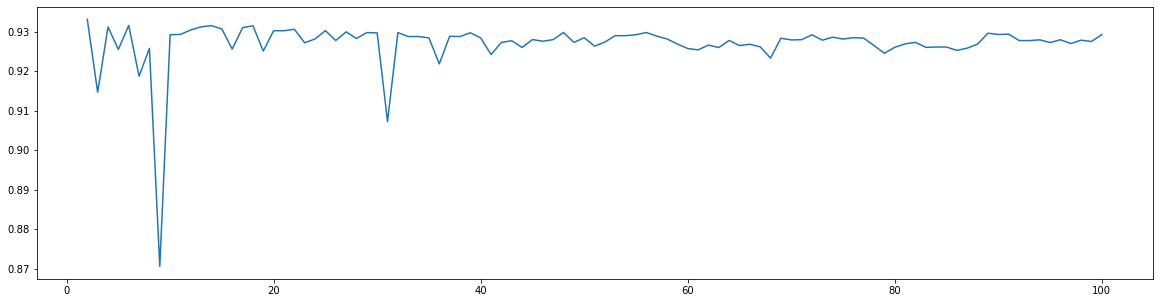

In [51]:
start=time.time()
scorel = []
for i in range(2,101): # compare the rf model include 2-100 samples
  rf = RandomForestRegressor(n_estimators=1,n_jobs=-1,random_state=90,max_depth=11,max_features=41,min_samples_leaf=1,
                             min_samples_split=i)
  rf.fit(train_X, train_y)
  pred_y = rf.predict(test_X)
  score = r2_score(test_y, pred_y)
  scorel.append(score)
print(max(scorel),(scorel.index(max(scorel)))+2)
end=time.time()
print('Running time: %s Seconds'%(end-start))
plt.figure(figsize=[20,5])
plt.plot(range(2,101),scorel)
plt.show()

when min_samples_split=2, we got the highest r2 score of 0.9331489910570554

### 6. Change criterion

In [52]:
rf= RandomForestRegressor(n_estimators=1,n_jobs=-1,random_state=90,max_depth=11,max_features=41,min_samples_leaf=1,
                             min_samples_split=2,criterion="mae")
rf.fit(train_X, train_y)
pred_y = rf.predict(test_X)
r2_score(test_y, pred_y)

0.9275150493701861

### Consclusion, the best Random Forest is the below one:

In [65]:
rf= RandomForestRegressor(n_estimators=1,
                          n_jobs=-1,
                          random_state=90,
                          max_depth=11,
                          max_features=41,
                          min_samples_leaf=1,
                          min_samples_split=2,
                          criterion="mse")
rf.fit(train_X, train_y)
pred_y = rf.predict(test_X)

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(test_y, pred_y))
print('Mean Squared  Error      : ', metrics.mean_squared_error(test_y, pred_y))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(test_y, pred_y)))
print('R Squared Error          : ', metrics.r2_score(test_y, pred_y))

r3_rf=result(test_y, pred_y)
compare['Random Forest Regression']=r3_rf
compare.to_csv('errors.csv')

		Error Table
Mean Absolute Error      :  0.004450677443578995
Mean Squared  Error      :  3.676115070498509e-05
Root Mean Squared  Error :  0.006063097451384489
R Squared Error          :  0.9331489910570554


In [66]:
cross_val_score(rf, X , y, cv=5, scoring='r2')

array([0.88497407, 0.93330569, 0.67110768, 0.65058418, 0.86585104])

Feature: 0, Score: 0.00005
Feature: 1, Score: 0.07126
Feature: 2, Score: 0.01169
Feature: 3, Score: 0.23140
Feature: 4, Score: 0.59778
Feature: 5, Score: 0.00023
Feature: 6, Score: 0.04891
Feature: 7, Score: 0.00079
Feature: 8, Score: 0.00001
Feature: 9, Score: 0.00129
Feature: 10, Score: 0.00041
Feature: 11, Score: 0.00091
Feature: 12, Score: 0.00002
Feature: 13, Score: 0.00069
Feature: 14, Score: 0.01676
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00001
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00004
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00003
Feature: 23, Score: 0.00015
Feature: 24, Score: 0.00006
Feature: 25, Score: 0.00117
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00031
Feature: 31, Score: 0.00001
Feature: 32, Score: 0.00026
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00068
Feature: 35, Score: 0.00065
Fe

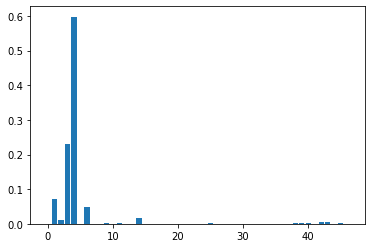

In [67]:
rf_importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(rf_importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(rf_importance))], rf_importance)
plt.show()

In [68]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = car_train.columns[1:]
for f in range(car_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feature_names[indices[f]], importances[indices[f]]))


 1) used_time                      0.597781
 2) odometer                       0.231404
 3) economy                        0.071264
 4) body_type_SUV                  0.048908
 5) colour_Blue                    0.016759
 6) litres                         0.011692
 7) model_Impreza                  0.004389
 8) model_Forester                 0.003842
 9) transmission_Automatic         0.001444
10) make_Subaru                    0.001340
11) fuel_Diesel                    0.001326
12) category_Other                 0.001291
13) colour_Grey                    0.001165
14) fuel_Unleaded                  0.000937
15) category_Used                  0.000913
16) body_type_Sedan                0.000788
17) colour_Black                   0.000691
18) colour_Silver                  0.000682
19) colour_White                   0.000653
20) model_RAV4                     0.000461
21) category_Private               0.000405
22) transmission_Manual            0.000402
23) colour_Orange               

IndexError: index 47 is out of bounds for axis 0 with size 47

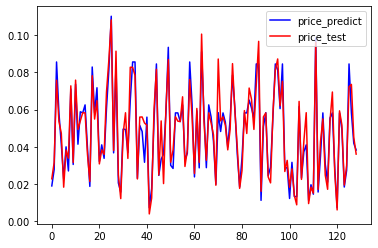

In [70]:
plt.figure()
plt.plot(range(len(pred_y[1:130])),pred_y[1:130],'b',label="price_predict")
plt.plot(range(len(pred_y[1:130])),test_y[1:130],'r',label="price_test")
plt.legend(loc="upper right")
plt.show()

# Model Application - Gradient Boosting Regressor

In [71]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor

train_X = car_train.drop(columns=['price'])
train_y = car_train[['price']]
train_y = train_y.values.ravel()
test_X = car_test.drop(columns=['price'])
test_y = car_test[['price']]
test_y = test_y.values.ravel()

gbr = GradientBoostingRegressor(random_state=0)
%time gbr.fit(train_X, train_y)
pred_y = gbr.predict(test_X)
r2_score(test_y, pred_y)

CPU times: user 3.77 s, sys: 40.1 ms, total: 3.81 s
Wall time: 3.87 s


0.920543516592137

## Use different parameters to improve the accuracy

### 1. Change n_estimators

0.9285784440108404 81
Running time: 71.80249810218811 Seconds


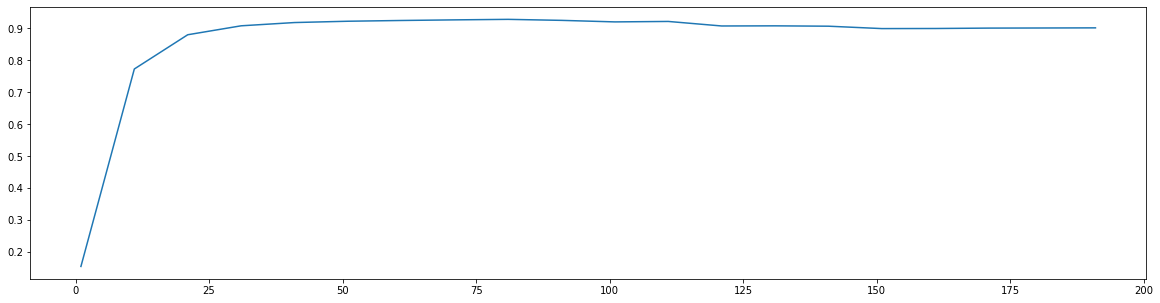

In [72]:
start=time.time()
scorel = []
for i in range(0,200,10): # compare the GB model include 1-200 decision trees
  gbr = GradientBoostingRegressor(n_estimators=i+1,random_state=0)
  gbr.fit(train_X, train_y)
  pred_y = gbr.predict(test_X)
  score = r2_score(test_y, pred_y).mean()
  scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1)
end=time.time()
print('Running time: %s Seconds'%(end-start))
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()

0.9290435897311095 81
Running time: 247.66445517539978 Seconds


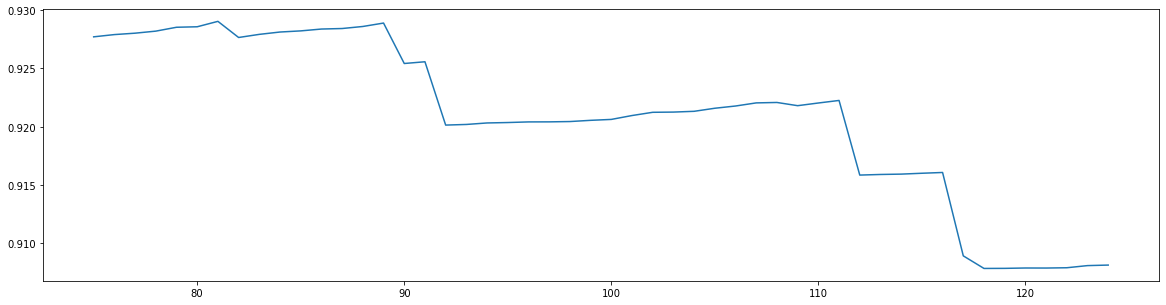

In [73]:
start=time.time()
scorel = []
for i in range(75,125): # compare the GB model include 75-125 decision trees
   gbr = GradientBoostingRegressor(n_estimators=i+1,random_state=0)
   gbr.fit(train_X, train_y)
   pred_y = gbr.predict(test_X)
   score = r2_score(test_y, pred_y).mean()
   scorel.append(score)
print(max(scorel),(scorel.index(max(scorel)))+75)
end=time.time()
print('Running time: %s Seconds'%(end-start))
plt.figure(figsize=[20,5])
plt.plot(range(75,125),scorel)
plt.show()

### 2. Change max_features

0.9296728851994794 16
Running time: 94.45817589759827 Seconds


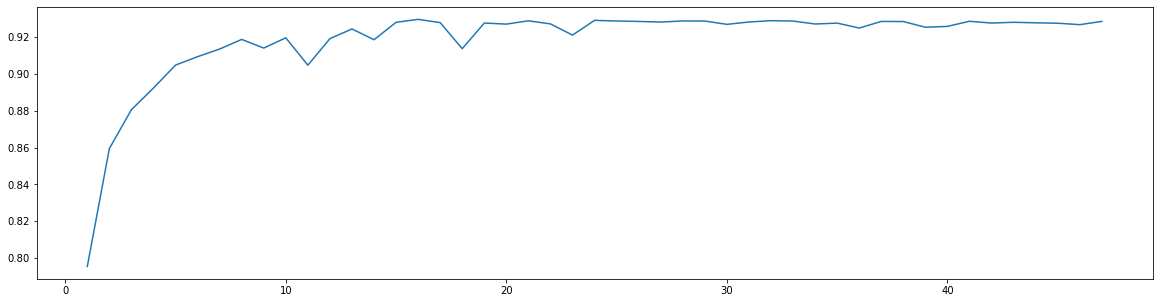

In [74]:
start=time.time()
scorel = []
for i in range(1,48): # compare the gb model include 1-48 features
   gbr = GradientBoostingRegressor(n_estimators=81,random_state=0,max_features=i)
   gbr.fit(train_X, train_y)
   pred_y = gbr.predict(test_X)
   score = r2_score(test_y, pred_y).mean()
   scorel.append(score)
print(max(scorel),(scorel.index(max(scorel)))+1)
end=time.time()
print('Running time: %s Seconds'%(end-start))
plt.figure(figsize=[20,5])
plt.plot(range(1,48),scorel)
plt.show()

### 3. Change min_samples_leaf

0.9304164485486327 22
Running time: 114.3051221370697 Seconds


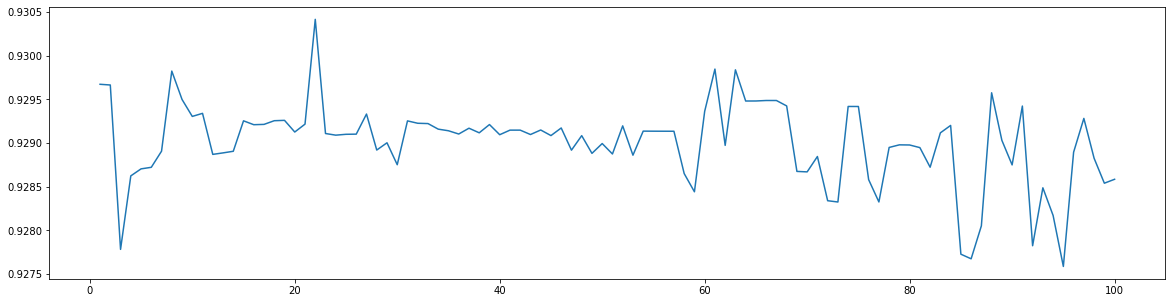

In [75]:
start=time.time()
scorel = []
for i in range(1,101): # compare the gb model include 1-100 samples
   gbr = GradientBoostingRegressor(n_estimators=81,random_state=0, max_features=16,min_samples_leaf=i)
   gbr.fit(train_X, train_y)
   pred_y = gbr.predict(test_X)
   score = r2_score(test_y, pred_y).mean()
   scorel.append(score)
print(max(scorel),(scorel.index(max(scorel)))+1)
end=time.time()
print('Running time: %s Seconds'%(end-start))
plt.figure(figsize=[20,5])
plt.plot(range(1,101),scorel)
plt.show()

### 4. Change min_samples_split

0.9304164485486327 2
Running time: 118.66928386688232 Seconds


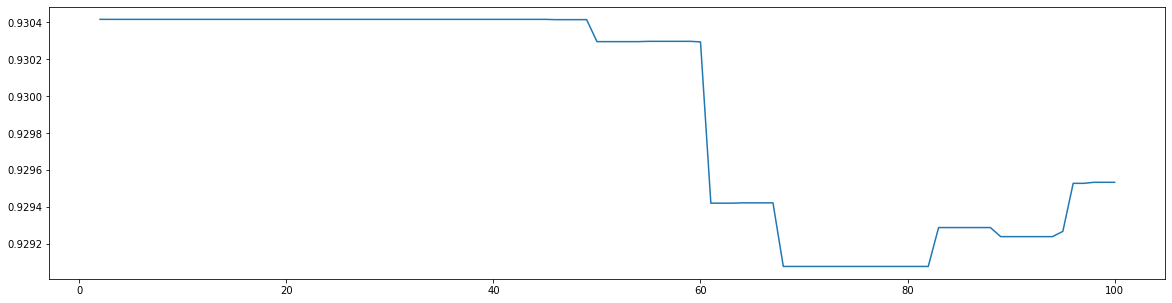

In [76]:
start=time.time()
scorel = []
for i in range(2,101): # compare the gb model include 2-100 samples
   gbr = GradientBoostingRegressor(n_estimators=81,random_state=0,max_features=16,min_samples_leaf=22,
                             min_samples_split=i)
   gbr.fit(train_X, train_y)
   pred_y = gbr.predict(test_X)
   score = r2_score(test_y, pred_y).mean()
   scorel.append(score)
print(max(scorel),(scorel.index(max(scorel)))+2)
end=time.time()
print('Running time: %s Seconds'%(end-start))
plt.figure(figsize=[20,5])
plt.plot(range(2,101),scorel)
plt.show()

### Consclusion, the best Gradient Boost Regressopn model is as below:

In [77]:
gbr = GradientBoostingRegressor(n_estimators=81,
                              random_state=0,
                              max_features=16,
                              min_samples_leaf=22,
                              min_samples_split=2)
gbr.fit(train_X, train_y)
pred_y = gbr.predict(test_X)

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(test_y, pred_y))
print('Mean Squared  Error      : ', metrics.mean_squared_error(test_y, pred_y))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(test_y, pred_y)))
print('R Squared Error          : ', metrics.r2_score(test_y, pred_y))

r4_gb=result(test_y, pred_y)
compare['Gradient Boost Regression']=r4_gb
compare.to_csv('errors.csv')

		Error Table
Mean Absolute Error      :  0.004672277809227544
Mean Squared  Error      :  3.8263766874108835e-05
Root Mean Squared  Error :  0.00618577132410412
R Squared Error          :  0.9304164485486327


In [78]:
cross_val_score(gbr, X , y, cv=5, scoring='r2')

array([0.92734771, 0.92877426, 0.92216243, 0.64594349, 0.93070868])

Feature: 0, Score: 0.00007
Feature: 1, Score: 0.24939
Feature: 2, Score: 0.01236
Feature: 3, Score: 0.29678
Feature: 4, Score: 0.32315
Feature: 5, Score: 0.00297
Feature: 6, Score: 0.01768
Feature: 7, Score: 0.00598
Feature: 8, Score: 0.00194
Feature: 9, Score: 0.02458
Feature: 10, Score: 0.00152
Feature: 11, Score: 0.00518
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00050
Feature: 14, Score: 0.00004
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00002
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00007
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00029
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00014
Feature: 35, Score: 0.00005
Fe

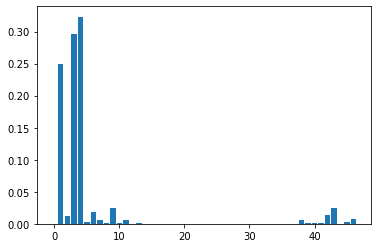

In [79]:
gbr_importance = gbr.feature_importances_
# summarize feature importance
for i,v in enumerate(gbr_importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(gbr_importance))], gbr_importance)
plt.show()

In [80]:
importances = gbr.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = car_train.columns[1:]
for f in range(car_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feature_names[indices[f]], importances[indices[f]]))

 1) used_time                      0.323152
 2) odometer                       0.296782
 3) economy                        0.249387
 4) category_Other                 0.024577
 5) model_Impreza                  0.024300
 6) body_type_SUV                  0.017685
 7) model_Forester                 0.013901
 8) litres                         0.012359
 9) transmission_Manual            0.007753
10) fuel_Diesel                    0.006058
11) body_type_Sedan                0.005981
12) category_Used                  0.005184
13) body_type_Hatch                0.002969
14) transmission_Automatic         0.002589
15) category_Demo                  0.001943
16) category_Private               0.001523
17) fuel_Unleaded                  0.000992
18) make_Toyota                    0.000891
19) make_Subaru                    0.000762
20) colour_Black                   0.000501
21) colour_Orange                  0.000288
22) colour_Silver                  0.000143
23) colour_Grey                 

IndexError: index 47 is out of bounds for axis 0 with size 47

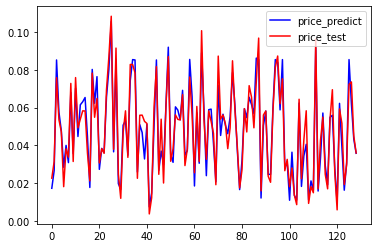

In [82]:
plt.figure()
plt.plot(range(len(pred_y[1:130])),pred_y[1:130],'b',label='price_predict')
plt.plot(range(len(pred_y[1:130])),test_y[1:130],'r',label='price_test')
plt.legend(loc='upper right')
plt.show()

# Overall Result

In [83]:
compare=pd.read_csv('./errors.csv',index_col=0)
compare

,Linear Regression,Decision Tree Regression,Random Forest Regression,Gradient Boost Regression
MAE,0.007220,0.005085,0.004451,0.004672
MSE,0.000086,0.000180,0.000037,0.000038
RMSE,0.009289,0.013435,0.006063,0.006186
R2 Score,84.310200,67.176400,93.314900,93.041600


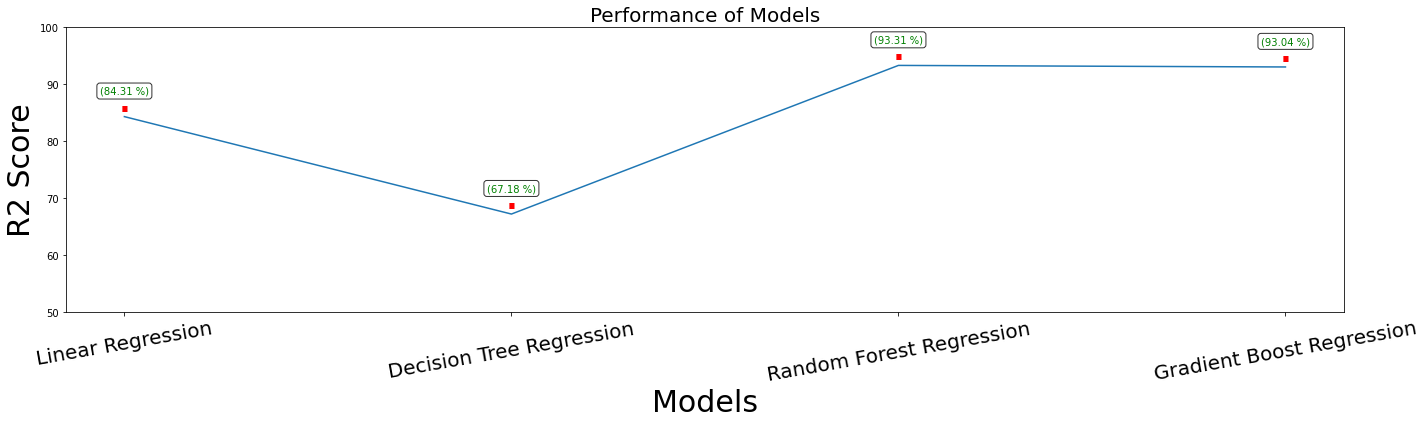

In [84]:
model_assessment=compare.loc['R2 Score']
x=list(range(len(model_assessment)))
y=list(range(50,101,10))
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.figure(figsize=(20,6))
plt.plot(model_assessment)
plt.yticks(y)
plt.xticks(fontsize=20)
plt.xticks(rotation = (10))
plt.xlabel("Models",fontsize=30)
plt.ylabel("R2 Score",fontsize=30)
plt.title("Performance of Models",fontsize=20)
for a,b in zip(x,y):
    b=model_assessment[a]
    val="("+str(round(model_assessment[a],2))+" %)"
    plt.text(a, b+4.5, val,horizontalalignment='center',verticalalignment='center',color='green',bbox=props)
    plt.text(a, b+3.5, '.',horizontalalignment='center',verticalalignment='center',color='red',fontsize=50)
plt.tight_layout()
plt.savefig('Overall-Performance.jpg',dpi=600)
plt.show()